# Try to implement Liu et al, just for longer periods of time

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Build scores between 0 and 100, some people have mean of 45, others have 55.

In [2]:
def create_population(blue_mu, orange_mu, sigma=10, number_of_people=100, lower_bound=10, higher_bound=90):
    
    blues = np.random.normal(blue_mu, sigma, (number_of_people,1))
    oranges = np.random.normal(orange_mu, sigma, (number_of_people,1))
    
    blues[blues > higher_bound] = higher_bound
    blues[blues < lower_bound] = lower_bound
    
    oranges[oranges > higher_bound] = higher_bound
    oranges[oranges < lower_bound] = lower_bound
    
    return blues, oranges

In [40]:
blue_mu = 40
orange_mu = 60
number_of_people = 1000

blues, oranges = create_population(blue_mu, orange_mu, number_of_people=number_of_people)

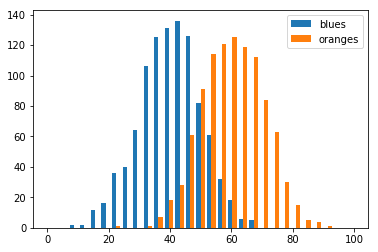

In [41]:
bins = np.linspace(0, 100, 30)
plt.hist([blues, oranges], bins, label=['blues', 'oranges'])
plt.legend(loc='upper right')
plt.show()

In [52]:
def classification_shift(blues, oranges, number_of_people=1000, amount_up=2, amount_down=2):
    
    probabilities_blue = np.random.uniform(0, 1, (number_of_people,1))
    probabilities_orange = np.random.uniform(0, 1, (number_of_people,1))

    shift_blue = probabilities_blue < (blues/100)
    shift_orange = probabilities_orange < (oranges/100)
    
    blues[shift_blue] += amount_up
    blues[not shift_blue.all()] -= amount_down
    blues[blues < 10] = 10
    blues[blues > 90] = 90
    
    oranges[shift_orange] += amount_up
    oranges[not shift_orange.all()] -= amount_down
    oranges[oranges < 10] = 10
    oranges[oranges > 90] = 90
    
    return blues, oranges

def natural_shift(blues, oranges, true_mean=60, by_how_much=1):
    if np.mean(blues) < true_mean:
        blues += by_how_much
    elif np.mean(blues) > true_mean:
        blues -= by_how_much
        
    if np.mean(oranges) < true_mean:
        oranges += by_how_much
    elif np.mean(oranges) > true_mean:
        oranges -= by_how_much
    
    return blues, oranges
    

def iterate_natural(blues, oranges, iters = 5):
    mean_history = np.zeros((iters, 2))
#     new_blues, new_oranges = classification_shift(blues, oranges)
    new_blues, new_oranges = natural_shift(blues, oranges)
    for i in range(iters):
#         new_blues, new_oranges = classification_shift(new_blues, new_oranges)
        new_blues, new_oranges = natural_shift(new_blues, new_oranges)
        mean_history[i, 0] = np.mean(new_blues)
        mean_history[i, 1] = np.mean(new_oranges)
        
    return new_blues, new_oranges, mean_history

def iterate(blues, oranges, iters = 5):
    mean_history = np.zeros((iters, 2))
    new_blues, new_oranges = natural_shift(blues, oranges)
    for i in range(iters):
        new_blues, new_oranges = classification_shift(new_blues, new_oranges)
        new_blues, new_oranges = natural_shift(new_blues, new_oranges)
        mean_history[i, 0] = np.mean(new_blues)
        mean_history[i, 1] = np.mean(new_oranges)
        
    return new_blues, new_oranges, mean_history

# Start experimenting with changes the mean values

## Iterate naturally, using only gradual shifts back to true distribution

In [53]:
blue_mu = 45
orange_mu = 55
true_mu = 55
number_of_people = 1000

blues, oranges = create_population(blue_mu, orange_mu, number_of_people=number_of_people)

In [54]:
new_blues, new_oranges, history = iterate_natural(blues, oranges, iters = 20)

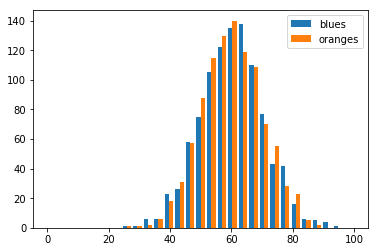

In [55]:
bins = np.linspace(0, 100, 30)
plt.hist([blues, oranges], bins, label=['blues', 'oranges'])
plt.legend(loc='upper right')
plt.show()

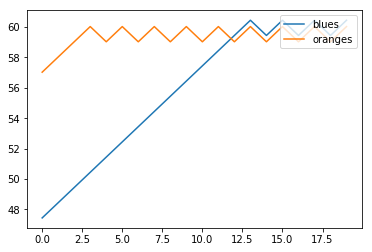

In [56]:
plt.plot(history[:, 0], label='blues')
plt.plot(history[:, 1], label='oranges')
plt.legend(loc='upper right')
plt.show()

## Include problematic stuff

In [60]:
blue_mu = 45
orange_mu = 55
true_mu = 55
number_of_people = 1000

blues, oranges = create_population(blue_mu, orange_mu, number_of_people=number_of_people)

In [61]:
new_blues, new_oranges, history = iterate(blues, oranges, iters = 200)

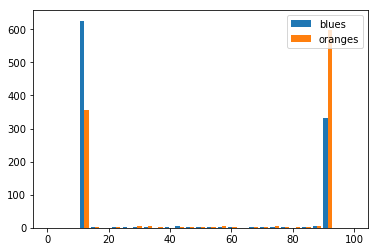

In [62]:
bins = np.linspace(0, 100, 30)
plt.hist([blues, oranges], bins, label=['blues', 'oranges'])
plt.legend(loc='upper right')
plt.show()